# Estadistica Aplicada
## Jorge Sebastian Aguirre Jimenez 1947870
## G41

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [6]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [7]:
from lifelines import CoxPHFitter

In [8]:
data=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

# Análisis exploratorio

In [9]:
data

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


Podemos ver que hay 1000 observaciones y 21 variables

In [10]:
data['cantidad'].mean()

3271.258

En promedio el banco otorga 3271.258 euros a cada persona por su prestamo

In [11]:
pagados=data.query("credito_pagado==1")

In [12]:
pagados['meses'].mean()

19.207142857142856

Las personas que han pagado su prestamo se tardan 19.21 meses para pagarlo por completo.

In [13]:
data['tasa_de_interes'].mean()

2.973

La tasa de interes promedio otorgada por el banco es de 2.973

In [14]:
pagados['cantidad'].mean(),pagados['tasa_de_interes'].mean()

(2985.457142857143, 2.92)

La cantidad promedio de los que pagaron es su totalidad fue de 2985.46 euros con una tasa de interes promedio de 2.92

In [15]:
pagadosnt=data.query("credito_pagado==0")

In [16]:
pagadosnt['cantidad'].mean(),pagadosnt['tasa_de_interes'].mean()

(3938.1266666666666, 3.0966666666666667)

El monto promedio que fue prestado a las personas que todavia no han termiando de pagar es de 2938.13 con una tasa de interes promedio de 3.097.

# Kaplan-meier

In [17]:
km1=KaplanMeierFitter().fit(data['meses'],data['credito_pagado'])

In [18]:
km1.median_survival_time_

24.0

El 50% de las personas que terminaron de pagar su prestamo se tardaron 24 meses lo cual es mayor que el tiempo promedio estimado en el punto 1-c

# Tipo de riesgo

In [19]:
exponencial=ExponentialFitter().fit(data['meses'],data['credito_pagado'])
weibull=WeibullFitter().fit(data['meses'],data['credito_pagado'])
logn=LogNormalFitter().fit(data['meses'],data['credito_pagado'])

In [20]:
print('exponencial:',exponencial.AIC_.round(2), 'weibull:',weibull.AIC_.round(2), 'LogNormal:', logn.AIC_.round(2))

exponencial: 6157.19 weibull: 5900.98 LogNormal: 5813.75


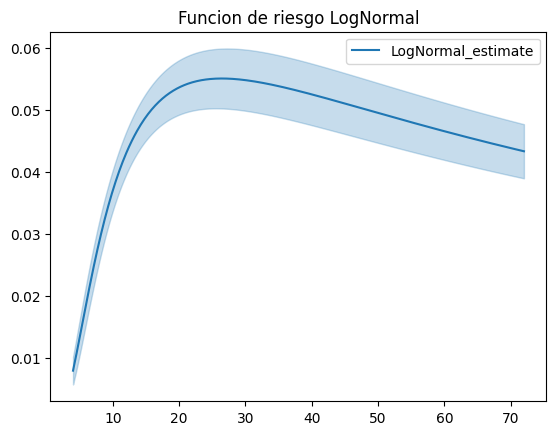

In [21]:
logn.plot_hazard()
plt.title('Funcion de riesgo LogNormal');

El riesgo del prestamo que se pago totalemnte es de tipo LogNormal

# Modelo Cox

Para este modelo vamos a elegir las variables:

Extranjero esto puede aumenatr o disminuir el riesgo dependiendo de que pais sea la persona que pidio el credito.

Edad ya que el tener más de 65 años indica que la persona esta jubilado y en este caso puede aumentar el riesgo de no pagar.

Numero de creditos ya que el tener muchos creditos puede llevar al impago de uno de estos.

Dependientes economicos ya que al tener gente que depende economicamente de ti puede aumentar los gastos que tienen lo que puede llevar a incrementar el riesgo de impago.

Tasa de interes ya que el tener un interes alto lleva a tener un riesgo mayor de impago.

Cantidad ya que el tener un prestamo grande puede llevar a tener un riesgo de impago alto.

In [22]:
data.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

In [23]:
data=data.drop('saldo_cuenta',axis=1)
data=data.drop('uso',axis=1)
data=data.drop('saldo_cuenta_ahorro',axis=1)
data=data.drop('genero_estado_civil',axis=1)
data=data.drop('aval',axis=1)
data=data.drop('activos',axis=1)
data=data.drop('planes_de_pago',axis=1)
data=data.drop('casa',axis=1)
data=data.drop('situacion_laboral',axis=1)
data=data.drop('años_trabajando',axis=1)
data=data.drop('historia_crediticia',axis=1)
data=data.drop('años_actual_domicilio',axis=1)
data=data.drop('telefono',axis=1)

In [24]:
data.dtypes

meses                      int64
cantidad                   int64
tasa_de_interes            int64
edad                       int64
numero_creditos            int64
dependientes_economicos    int64
extranjero                 int64
credito_pagado             int64
dtype: object

In [25]:
data=data.dropna()

In [26]:
cph1 = CoxPHFitter().fit(data, 'meses', 'credito_pagado')
cph1.print_summary()
cph1.params_
cph1.hazard_ratios_

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4042.59
         time fit was run = 2023-10-07 02:20:46 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes          -0.41       0.67       0.04            -0.48            -0.33                 0.62                 0.72
edad                      0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
numero_creditos           0.12       1.13       0.07            -0.01             0.26                 0.99                 1.29
dependientes_economicos  -0.00       1.00       0.11            -0.21             0.21                 0.81                 1.23
extranjero               -1.19       0.31       0.18            -1.55            -0.83                 0.21                 0.44

                          cmp to      z      p   -log2(p)
covariate                                                
cantidad                    0.00 -16.35 <0.005     197.14
tasa_de_interes             0.00 -11.10 <0.005      92.71
edad                        0.00   4.51 <0.005      17.24
numero_creditos             0.00   1.86   0.06       3.98
dependientes_economicos     0.00  -0.01   0.99       0.02
extranjero                  0.00  -6.45 <0.005      33.03
---
Concordance = 0.78
Partial AIC = 8097.19
log-likelihood ratio test = 453.58 on 6 df
-log2(p) of ll-ratio test = 312.53

covariate
cantidad                   0.999621
tasa_de_interes            0.665874
edad                       1.015288
numero_creditos            1.132897
dependientes_economicos    0.998525
extranjero                 0.305123
Name: exp(coef), dtype: float64

**Cantidad**, Se rechaza H0, La cantidad prestada disminuye el riesgo de no terminar de pagar en un 0.0379%.

**Tasa de interes**, Se rechaza H0, La tasa de interes disminuye el riesgo de no terminar de pagar en un 33%.

**edad**, Se rechaza H0, la edad incrementa el riesgo de no terminar de pagar en un 2%.

**Número de creditos**, No se rechaza H0, el numero de creditos que tiene la persona no afecta el riesgo de no terminar de pagar.

**Dependientes económicos**, No se rechaza H0, el numero de personas que dependen de ti no afecta el riesgo de no terminar de pagar.

**Extranjero**, Se rechaza H0, el ser extranjero disminuye en un 69% el riesgo de no terminar de pagar con respecto a los que no son extranjeros.

La base de datos corresponde a la empresa Banco de la Ilusión en donde se encuentra la información de 1000 clientes los cuales pidieron préstamos de acuerdo con sus necesidades, esta base de datos se divide en 21 variables de las cuales las más importantes son: los meses que llevan pagando su crédito, la cantidad que pidieron de crédito, la tasa de interés que aceptaron pagar, la edad de los clientes, el número de créditos que han pedido hasta el momento, los dependientes económicos que tienen a su cargo, si son extranjeros, si ya terminaron de pagar su crédito y otras.

En análisis rápido descubrimos que en promedio el banco presta 3271.258 euros por cada préstamo que hace, las personas que ya terminaron de pagar su crédito les toma 19.21 meses en promedio y tienen una tasa de interés del 2.97% y en cuanto a las personas que aún no han terminado de pagar tienen una tasa de interés del 3.097%.

La función de riesgo sigue una función LogNormal lo que significa que en un principio el riesgo va ir creciendo hasta que llegue a su punto máximo (en promedio a los 24 meses) y luego va ir decayendo, algo que puede hacer la empresa para disminuir el riesgo de que sus clientes no terminen de pagar es: evitar prestar cantidades muy grandes ya que esto disminuye el riesgo en un 0.0379%, evitar dar tasas de intereses muy grandes ya que esto disminuye el riesgo en 33%, evitar prestar dinero a los clientes que son mayores de edad ya que esto incrementar el riesgo en un 2% e intentar prestarle dinero a los clientes extranjeros ya que estos tiene un riesgo menor con respecto a los que no son extranjeros.